**Naam: Nathan Vermeiren**

## Vraag1: Analytische oplossing van de inwendige gasdruk

#### Scheiden van variabelen

Alle p-termen aan 1 kant, t-termen aan de andere kant:

dp / (pe - p) = k * dt

---

#### Integreren

Integreer beide zijden:

∫ (1 / (pe - p)) dp = ∫ k dt

Substitutie: u = pe - p en dus du = -dp

-∫ (1 / u) du = k * t + C  
ln|pe - p| = -k * t + C'

---

#### Oplossen voor p(t)

pe - p = C * exp(-k * t)  
=> p(t) = pe - C * exp(-k * t)

Gebruik beginvoorwaarde p(0) = p0:

p0 = pe - C => C = pe - p0

**Oplossing:**

p(t) = pe + (p0 - pe) * exp(-k * t)

---



## Vraag 2: Halveringstijd en uitdrukking in termen van τ

We weten uit vraag 1:

p(t) = pe + (p0 - pe) * exp(-k * t)

We definieren de halveringstijd τ als de tijd dat het verschil met de omgevingsdruk halveert:

p(τ) - pe = 1/2 * (p0 - pe)

Invullen van de oplossing:

p(τ) - pe = (p0 - pe) * exp(-k * τ) = 1/2 * (p0 - pe)

=> exp(-k * τ) = 1/2  
=> k = ln(2) / τ

**We zien dus**

1. De halveringstijd τ hangt alleen af van het weefseltype (via k) en is onafhankelijk van p0 of pe.
2. De oplossing kan nu in termen van τ geschreven worden:

**Oplossing**

p(t) = pe + (p0 - pe) * 2^(-t / τ)


## Vraag 3: Maximale tijd in vereenvoudigde situatie

#### Wat weten we al?

- M => 1/2.15 druk voorwaarde
- p0 => 1 Bar (aan het oppervlak)
- pe => 1 + d/10 (per 10m stijgt de druk met 1 bar)
- T => de tijd die de duiker op die diepte blijft
- τ => halveringstijd voor type weefsel 
- p(t) = pe + (p0 - pe) * 2^(-t / τ) => de formule voor de inwendige druk te meten
- p(t) mag niet groter zijn dan 1/M * pn (met M = 1/2.5, en pn = 1 bar aan het oppervlak)

#### Wat zoeken we?

p(t) < 1/M => p(T_max) = 1/M <=> p(T_max) = 2.5

We zoeken dus de maximale tijd die men mag doorbrengen op gegeven diepte voor gegeven spierfweefsel. Zoek eerst wanneer p(T_max) = 1/M.

#### berekeningen

- p(T_max) = 1/M, gebruik formule voor p(T_max)
- <=> pe + (p0 - pe)2^(-T_max / τ) = 1/M, zet pe om naar rechterlid en deel door (p0 - pe)
- <=> 2^(-T_max / τ) = (1/M - pe) / (p0 - pe), neem log2 van beide kanten en zet -τ om naar rechterlid
- <=> T_max = -τ log2((1/M - pe) / (p0 - pe)), vul in wat we kennen
- <=> T_max = -τ log2( (2.15 - (1+d/10)) / (1 - (1 + d/10)) )

Nu hebben we een formule voor T_max voor op zekere diepte d.


In [2]:
p0 = 1            # bar, aan het oppervlak
M = 1/2.15        # Haldane factor
tau_list = [20, 40, 75]  # minuten, halveringstijden van weefsels
dieptes = [15, 20, 25, 30]  # meters

def Tmax(p0, pe, tau, M):
    # controle: als pe <= 1/M, dan theoretisch onbeperkt
    if pe <= 1/M:
        return float('inf')
    else:
        return -tau * log((1/M - pe)/(p0 - pe), 2)


resultaten = {}
for d in dieptes:
    pe = 1 + d/10
    Tmax_per_tau = []
    for tau in tau_list:
        T = Tmax(p0, pe, tau, M)
        Tmax_per_tau.append(T)
    # bewaar resultaten per diepte
    resultaten[d] = Tmax_per_tau


print("Diepte (m) | T_max (min) voor τ=20,40,75")
for d, Tmax_vals in resultaten.items():
    print(f"{d:10} | {['{:.1f}'.format(t) if t < float('inf') else '∞' for t in Tmax_vals]}")
    
# bepaal de beperkende weefsel (kortste T_max)
print("\nBeperkend weefsel per diepte (kortste T_max):")
for d, Tmax_vals in resultaten.items():
    min_val = min(Tmax_vals)
    idx = Tmax_vals.index(min_val)
    print(f"Diepte {d} m: T_max = {min_val:.1f} min (τ = {tau_list[idx]} min)")


Diepte (m) | T_max (min) voor τ=20,40,75
        15 | ['42.0', '84.0', '157.5']
        20 | ['24.7', '49.4', '92.6']
        25 | ['17.8', '35.6', '66.7']
        30 | ['13.9', '27.9', '52.3']

Beperkend weefsel per diepte (kortste T_max):
Diepte 15 m: T_max = 42.0 min (τ = 20 min)
Diepte 20 m: T_max = 24.7 min (τ = 20 min)
Diepte 25 m: T_max = 17.8 min (τ = 20 min)
Diepte 30 m: T_max = 13.9 min (τ = 20 min)


#### Tussen resultaat
We zien dus dat tau = 20min altijd de limiterende factor is voor de tijd die we mogen doorbrengen

#### Diepte voor onbeperkte tijd 

We vertrekken van: 

2.15 * (1 + d_end/10) > p(inf)

onbeperkte tijd dus t -> inf en d_end staat voor de nieuwe diepte naar waar we gaan (in dit geval d_end = 0 want oppervlak)

- 2.15 * (1 + d/10) > p(inf)
- 2.15 > pe     (pe is druk op bepaalde diepte d die we zoeken)
- 2.15 > (1 + d/10)      formule voor druk op bepaalde diepte
- d < 11.5

=> Zolang we niet dieper dan 11.5m duiken moeten we volgens Haldane geen rekening houden met DCS

### Onze resultaten op een grafiek

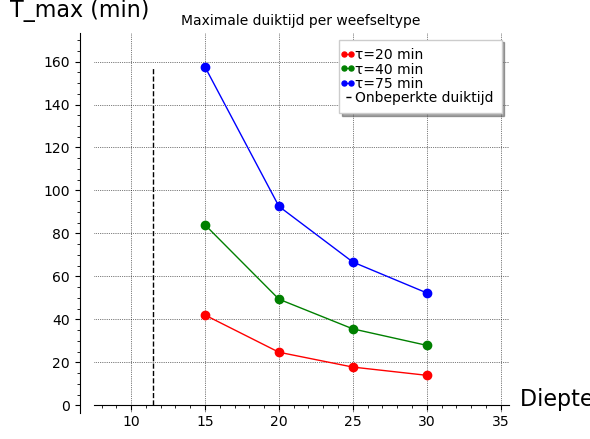

In [56]:
kleuren = ['red', 'green', 'blue']

plots_list = []

for i, tau in enumerate(tau_list):
    T_vals = [resultaten[d][i] for d in dieptes]
    T_vals_plot = [t if t != float('inf') else None for t in T_vals]
    plots_list.append(list_plot(list(zip(dieptes, T_vals_plot)), 
                                marker='o', plotjoined=True, 
                                color=kleuren[i], legend_label=f"τ={tau} min"))

# verticale lijn bij d = 11.5 m (max diepte voor onbeperkte tijd)
verticale_lijn = line([(11.5,0), (11.5, max(max(resultaten[d]) for d in dieptes))], 
                      color='black', linestyle='--', legend_label='Onbeperkte duiktijd')

# combineer alles
show(sum(plots_list) + verticale_lijn, figsize=6, gridlines=True, 
     title="Maximale duiktijd per weefseltype",
     xmin=8,
     ymax=170,
     xmax=35,
     axes_labels=["Diepte (m)", "T_max (min)"], legend_loc='upper right')


## Vraag 4: 25m -> 15m

#### Wat kennen we? (Zie ook vorige vraag)

- d = 25m | 15m -> afhankelijk van de tijd (0-15, 15-...)

Gebruik vorige formule: p(t) = pe + (p0 - pe)*2^(-t / τ) voor stuksgewijze functie

- p_25(t) = (1 + 25/10) + (1 - 25/10) * 2^(-t/τ)
- p_15(t) = (1 + 15/10) + (p_25(15) - 15/10) * 2^(-(t-15)/τ) 

Merk op bij p_15(t) dat t -> t-15, anders zou het lijken alsof we er al 15 min waren.

In [17]:
#deze functies geven de gedachte gang, hierna bepalen we de symbolishe oplossing voor p_15(t)

def p_25(t, tau):
    if t > 15:
        raise Exception("Argument t must not be over 15")
    # (1 + 25/10) + (1 - 25/10) * 2^(-t/tau)
    return 3.5 - 2.5*2^(-t/tau)

def p_15(x, tau):
    if t < 15:
        raise Exception("Argument t must not be under 15")
    # (1 + 15/10) + (p_25(15) - 15/10) * 2^(-(t-15)/tau)
    return 2.5 + (p_25(15) - 1.5) * 2^(-(x)/tau)

We zoeken dus nu voor welke waarden van t de volgende ongelijkheid geldt.
- p_15(t) < 1/M * pn
  
(met M = 1/2.15 en pn de druk op nieuwe diepte -> 1 bar aan het oppervlak)

In [19]:
x = var('t')
tau = var('tau')
p25_15 = var('p25_15') 

M = 1/2.15

eq = 2.5 + (p25_15 - 1.5) * 2**(-(x)/tau) == 1/M

# we berekenen t
sol = solve(eq, x)
sol


[t == tau*log(-20/7*p25_15 + 30/7)/log(2)]

We kunnen deze formule nu gebruiken om de verschillende tijdstippen te berekenen voor de verschillende spierweefsels.

We checken eerst ofdat 
- p_25(15) < 1/M

Als dit zo is mogen we altijd direct naar het oppervlak.

In [34]:
tau_vals = [20, 45, 70]

print("Tau (min) | Inwendige druk na 15 min op 25 m (bar)")
print("--------------------------------------------------")

for tau in tau_vals:
    p_val = p_25(15, tau).n()  # inwendige druk na 15 min op 25 m
    print(f"{tau:9} | {p_val:.4f}")

Tau (min) | Inwendige druk na 15 min op 25 m (bar)
--------------------------------------------------
       20 | 2.0135
       45 | 1.5157
       70 | 1.3451


#### Verklaring resultaten
We zien dus dat de inwendige druk op tijdstip 15 altijd kleiner is als onze voorwaarde die moet voldaan worden. Moesten we de formule gebruiken die we gevonden hebben (t == tau * log(-20/7 * p25_15 + 30/7)/log(2)) om t te proberen vinden wanneer die gelijk is aan 2.15 dan zullen we complexe getallen vinden aangezien de druk altijd lager is dan 2.15.

We mogen dus voor elke tau direct weer naar het opppervlak komen.

Dit is eigenlijk ook logisch aangezien we in vraag 3 kunnen zien dat we maximaal 17min op 25m diepte mochten blijven. En aangezien we in dit scenario enkel 15 min op 25m blijven, zouden we direct weer naar het oppervlak mogen zonder tussenstop te moeten maken. 

De verschillende halveringstijden maken hier dus niet uit.

## Vraag 5 analytische oplossing voor constante duiksnelheid

### Wat weten we?

- dp/dt = k*(pe(t) - p(t))
- pe(t) = pe0 + r * t/10    (met r de duiksnelheid en pe0 druk bij begin van duik -> aan oppervlak dus 1)

### Berekeningen

- p' = k * (pe(t) - p(t))    we willen omzetten naar ODE en dan karakteristieke gebruiken
- p' + k*p = k * pe(t)       vul pe(t) in
- p' + k*p = k * (pe0 + r * t/10)

**Karakteristieke vgl en opl**
- p' + kp = 0
- <=> r^1 + kr^0 = 0
- <=> r + k = 0
- <=> r = -k

p_k(t) = C * e^(-k*t)


**Particuliere vgl en opl**
- f(t) = k * (pe0 + r * t/10)

We proberen een linaire oplossing:

- p_p(t) = A*t + B
- p_p' = A

We vervangen dit in de ODE

- A + k*(A*t + B) = (k * r/10) + k * pe0

Nu zoeken we A en B, doe dit door eerst coeff van t te bekijken:

- k * A = k * r/10 => A = r/10

We bekijken de constante term om B te krijgen

- A + k* B = k * pe0 => r/10 + k * B = k * pe0 => B = pe0 - r/(10*k)


p_p(t) = (r/10)*t + pe0 - r/(10*k)

**Algemene oplossing**

- p_k(t) + p_p(t) = C * e^(-k*t) + (r/10)*t + pe0 - r/10 * k


**Restrictie op beginvoorwaarde**

we weten p(0) = p0, vul dus in:
- p0 = C * e^0 + 0 + pe0 - r/10 * k
- <=> C = p0 - pe0 + r/(10*k)


**Definitieve oplossing met beginvoorwaarde**
- p(t) = (p0 - pe0 + r/(10*k)) * e^(-k*t) + (r/10)*t + pe0 - r/(10 * k)
- <=> p(t) = (p0 - pe0 + r/(10*k)) * e^(-k*t) + pe0 + (t - 1/k) * r/10

**Oplossing met k = ln2 / tau**
- p(t) = (p0 - pe0 + (r * τ)/(10*ln2))*2^(-t/τ)  +  pe0 +  r/10 * (t - τ/ln2)

### Effect van dalen en stijgen aan constante snelheid

Wanneer een duiker aan een constante snelheid r duikt of stijgt, verandert de druk waaraan het lichaam wordt blootgesteld geleidelijk met de tijd. De inwendige gasdruk in de weefsels probeert altijd deze omgevingsdruk te volgen, maar doet dit met een vertraging die afhankelijk is van het type weefsel (via de constante k).

**Situatie bij dalen (r > 0):**
- De omgevingsdruk neemt toe naarmate de duiker dieper gaat.
- De inwendige gasdruk in de weefsels stijgt mee, omdat de weefsels gas opnemen.

**Situatie bij stijgen (r < 0):**
- De omgevingsdruk neemt af naarmate de duiker stijgt.
- De inwendige gasdruk probeert af te nemen, maar kan tijdelijk hoger blijven dan de omgevingsdruk.
- Als de stijging te snel gaat, kan de druk in de weefsels te hoog zijn ten opzichte van de omgeving, wat het risico op decompressieziekte (DCS) verhoogt.

**Belangrijkste conclusie:**
- Wiskundig verandert alleen het teken van de snelheid r; de methode om de druk te berekenen blijft hetzelfde.
- Fysisch betekent dit dat dalen leidt tot een toename van weefseldruk, terwijl stijgen leidt tot een afname.



In [1]:
r = 18

## Vraag 6: vraag 3 maar met een constante duiksnelheid

#### Wat weten we?

- p(t) = (p0 - pe0 + (r * τ)/(10*ln2))*2^(-t/τ) + pe0 + r/10 * (t - τ/ln2)
- d(t) = 18*t (diepte als we altijd dalen)
- r = 18m/min


#### Verdeel functie in 3 stukken, dalen, blijven, stijgen
- zie code voor opsplitsing

#### Neem volgende parameters als tijdstippen
- t0 -> start duik
- t1 -> klaar met dalen
- t2 -> start stijgen
- t3 -> oppervlak

**Ter verduidelijking: Ik noem de diepte d de bodem, dus de bodemtijd is de tijd waarbij hij op diepte d blijft.**

In [2]:
ln2 = log(2)
r=18
M = 1/2.15
taus = [20, 40, 75] 
dieptes = [15, 20, 25, 30]

def p_dalen(t, tau, r=18, pe0=1, p0=1):
    return (p0 - pe0 + (r * tau)/(10*ln2)) * 2**(-t/tau) + pe0 + r/10 * (t - tau/ln2)

def p_blijven(T, tau, t1, r=18, pe0=1, p0=1):
    p_t1 = p_dalen(t1, tau)  # inwendige druk bij aankomst bodem
    pe_b = pe0 + r/10 * t1              # constante omgevingdruk beneden
    return pe_b + (p_t1 - pe_b) * 2**(-T/tau)


def p_stijgen(T, tau, t2, d, r=18, pe0=1, p0=1):
    t1 = t2 - d/r  # tijd dat dalen klaar was
    p_start = p_dalen(t2, tau, r, pe0, p0)  # druk bij aankomst op diepte
    pe_start = pe0 + d/10  # druk op diepte
    return pe0 + (p_start - pe_start) * 2**(-T/tau) + (-r/10) * T



# deze functie zegt ons voor gegeven tijdstip t en t2 wanneer we terug naar boven gaan (en diepte d en halveringstijd tau) wat de interne 
#druk is in ons weefsel. In deze functie dijken we dus totdat we op de diepte zijn en blijven daar tot tijdstip t.
def p_duik(t, tau, d, t2, r=18, pe0=1, p0=1):
    #we zoeken t2 -> tijdstip wanneer we terug moeten stijgen
    pt = 0
    #pt moet ten alle tijden voldoen aan: p(t)*M < 1 <=> p(t) < 1/M 
    t1 = (d/r)
    
    if t <= t1:
        # fase dalen
        pt = p_dalen(t, tau).n()
    
    elif t1 < t < t2:
        # fase blijven op diepte
        pt = p_blijven(t-t1, tau, t1).n()

    else:
        pt = p_stijgen(t-t2, tau, t2, d)

    return pt


# deze functie zeg ons gegeven een tijdstip t2  ofdat we ooit boven 
# de toegelate inwendige druk zaten
def is_safe(t2, tau, d, r=18, pe0=1, p0=1, M=1/2.15):
    t1 = d/r
    # check op discrete tijden
    for t in srange(0, t2, 0.1):
        if p_duik(t, tau, d, t2, r, pe0, p0) > 1/M:
            return False
    return True

def find_t2_max(tau, d, r=18, pe0=1, p0=1, M=1/2.15):
    t1 = d/r
    t2_min = t1
    t2_max = t1 + 240  # arbitraire max duiktijd -> duikfles zal niet meer dan 4 uur zuurstof hebben
    eps = 0.1          # gewenste nauwkeurigheid in minuten
    
    while t2_max - t2_min > eps:
        t2_mid = (t2_min + t2_max)/2
        if is_safe(t2_mid, tau, d, r, pe0, p0, M):
            t2_min = t2_mid
        else:
            t2_max = t2_mid
            
    return t2_min  # maximale veilige t2

results = []

for d in dieptes:
    T_max_values = []
    t2_values = []
    tau_values = []

    for tau in taus:
        t2_max = find_t2_max(tau, d)        # totale tijd tot opstijgen
        T_max = t2_max - d/r                 # tijd op de bodem
        T_max_values.append(T_max.n())
        t2_values.append(t2_max.n())
        tau_values.append(tau)

    # bottleneck: de strengste halveringstijd = kleinste T_max
    idx = T_max_values.index(min(T_max_values))
    results.append((d, tau_values[idx], T_max_values[idx], t2_values[idx]))

# print tabel
print("| Diepte (m) | Bottleneck tau (min) | Maximale bodemtijd (min) | Totale duiktijd t2 (min) |")
print("|------------|--------------------|--------------------------|---------------------------|")
for d, tau, T_max_val, t2_val in results:
    print(f"| {d:10} | {tau:18} | {T_max_val:24.1f} | {t2_val:25.1f} |")



| Diepte (m) | Bottleneck tau (min) | Maximale bodemtijd (min) | Totale duiktijd t2 (min) |
|------------|--------------------|--------------------------|---------------------------|
|         15 |                 20 |                     41.7 |                      42.5 |
|         20 |                 20 |                     24.1 |                      25.3 |
|         25 |                 20 |                     17.1 |                      18.5 |
|         30 |                 20 |                     13.1 |                      14.8 |


## Vraag 7: Beste combinatie van dieptes

In [65]:
import itertools

r = 18.0      
pe0 = 1.0   
dt = 0.1  # tijdstap voor sampling

# discrete p(t) samples voor segment
def duik_segment_samples(p_start, tau, d_start, d_end, t_stay, dt=0.1, r=18, pe0=1):
    """
    Bereken p(t) samples tijdens een segment (dalen/stijgen + blijftijd)
    """
    times = []
    pressures = []
    
    # 1 dalen/stijgen
    dt_seg = abs(d_end - d_start)/r
    t = 0.0
    while t <= dt_seg:
        pe_now = pe0 + (d_start + (d_end - d_start)*t/dt_seg)/10
        p_now = pe_now + (p_start - pe_now) * 2**(-t/tau)
        times.append(t)
        pressures.append(p_now)
        t += dt
    
    p_after_move = pressures[-1] if pressures else p_start
    
    # 2 blijven op einddiepte
    t = 0.0
    while t <= t_stay:
        pe_now = pe0 + d_end/10
        p_now = pe_now + (p_after_move - pe_now) * 2**(-t/tau)
        times.append(times[-1]+dt if times else t)
        pressures.append(p_now)
        t += dt

    return times, pressures

# --- Functie: duiksegment wrapper ---
def duik_segment(p_start, tau, d_start, d_end, t_stay):
    return duik_segment_samples(p_start, tau, d_start, d_end, t_stay, dt)

# --- Functie: beste volgorde + p(t) samples ---
def beste_volgorde_samples(tijd_en_diepte, tau):
    perms = list(itertools.permutations(tijd_en_diepte))
    resultaten = []

    for perm in perms:
        p = 1.0
        d = 0.0
        total_times = []
        total_pressures = []

        for (T, diepte) in perm:
            t_seg, p_seg = duik_segment_samples(p, tau, d, diepte, T, dt, r, pe0)
            # continue tijd
            if total_times:
                t_seg = [t + total_times[-1] for t in t_seg]
            total_times.extend(t_seg)
            total_pressures.extend(p_seg)
            p = p_seg[-1]
            d = diepte

        # terug naar oppervlak
        t_seg, p_seg = duik_segment_samples(p, tau, d, 0.0, 0.0, dt, r, pe0)
        if total_times:
            t_seg = [t + total_times[-1] for t in t_seg]
        total_times.extend(t_seg)
        total_pressures.extend(p_seg)
        p = p_seg[-1]

        resultaten.append((perm, p, total_times, total_pressures))

    beste = min(resultaten, key=lambda x: x[1])
    return beste, resultaten




In [75]:
def plot_duik_profiel(tijd_en_diepte, taus, safety_pressure=2.15, ymax_plot=2.8):

    colors = ["red", "green", "blue"]
    
    plot_all = Graphics()
    
    for i, tau in enumerate(taus):
        beste, alle = beste_volgorde_samples(tijd_en_diepte, tau)
        # print beste volgorde en einddruk
        volgorde_str = [f"{int(diepte)}m" for _, diepte in beste[0]]
        print(f"Tau = {int(tau)} => Beste volgorde: {volgorde_str} met einddruk {beste[1]:.3f} bar")
        
        times, pressures = beste[2], beste[3]
        plot_all += list_plot(list(zip(times, pressures)), plotjoined=True, color=colors[i], legend_label=f"tau={int(tau)} min")
    
    # horizontale lijn voor safety value
    total_time = max(max(beste[2]) for beste, _ in [beste_volgorde_samples(tijd_en_diepte, tau) for tau in taus])
    plot_all += line([(0, safety_pressure), (total_time, safety_pressure)], color="black", linestyle="--", legend_label=f"Safety {safety_pressure} bar")
    
    plot_all.show(legend_loc="upper left", figsize=[8,4], gridlines=True, ymax=ymax_plot)



Tau = 20 => Beste volgorde: ['20m', '15m', '10m'] met einddruk 2.217 bar
Tau = 40 => Beste volgorde: ['20m', '15m', '10m'] met einddruk 1.969 bar
Tau = 75 => Beste volgorde: ['20m', '15m', '10m'] met einddruk 1.662 bar


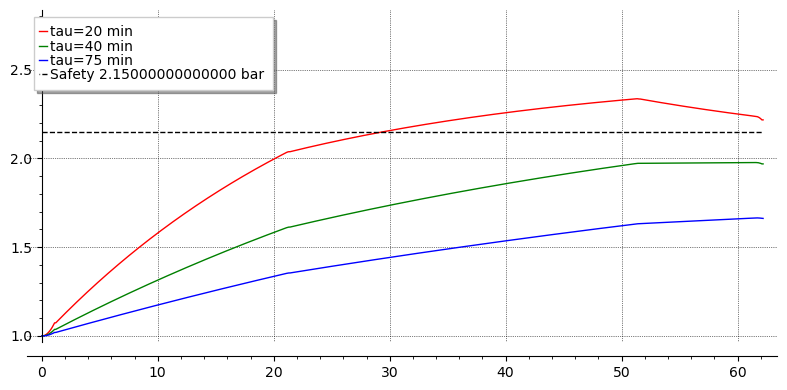

In [76]:
# scenario 1: oorspronkelijke tijden
tijd_en_diepte1 = [(20.0, 20.0), (10.0, 10.0), (30.0, 15.0)]
taus = [20.0, 40.0, 75.0]
plot_duik_profiel(tijd_en_diepte1, taus)


### Uitleg grafiek interne druk in weefsels

De grafiek toont het verloop van de interne druk \(p(t)\) in een duiker's weefsels voor drie verschillende halveringstijden tijdens dezelfde duik:  

- Elke gekleurde lijn geeft de interne druk weer voor een specifieke \(\tau\).  
- De zwarte stippellijn op 2.15 bar geeft de veiligheidslimiet aan, dit wil zeggen dat we niet rechtstreeks meer naar het oppervlak kunnen zonder risico te lopen op DCS.  

**Observaties uit de grafiek:**

- Voor tau = 20 overschrijdt de interne druk duidelijk de 2.15 bar limiet. Dit betekent dat dit weefsel te snel verzadigd raakt en het risico op DCS groot is.  
- Het resultaat benadrukt dat recht omhoog naar het oppervlak stijgen zonder tussenstops gevaarlijk is.  


Dus zelfs de beste volgorde van dieptes maakt het niet mogelijk om deze duik te maken zonder decompressie stops.

### kan de tijdsduur een effect hebben op de volgorde?

Dat kan zeker. Omdat de interne druk afhankelijk is van hoe lang je op een bepaalde diepte blijft, kan de volgorde van de duik daardoor beinvloed worden. Intuitief zou je meestal eerst naar het diepste deel gaan en het meest ondiepe deel als laatste, zodat de hoge druk van de diepe duik al deels kan “wegwerken” tijdens de minder diepe segmenten.

Toch kunnen de specifieke tijdsduren van elk segment een andere volgorde voordeliger maken. Bijvoorbeeld, als een minder diep segment veel langer duurt dan de diepe segmenten, kan het soms slimmer zijn om dat segment eerder in de duik te doen. Zo kan de einddruk bij het oppervlak lager uitvallen.

Zie volgend scenario.




Tau = 20 => Beste volgorde: ['15m', '20m', '10m'] met einddruk 1.909 bar
Tau = 40 => Beste volgorde: ['15m', '20m', '10m'] met einddruk 1.693 bar
Tau = 75 => Beste volgorde: ['15m', '20m', '10m'] met einddruk 1.464 bar


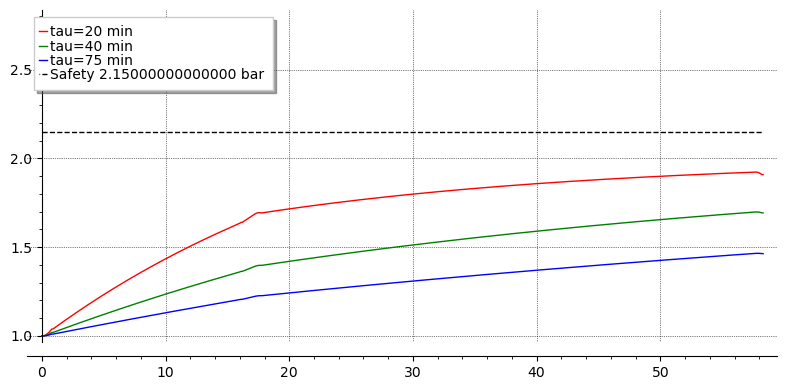

In [80]:
# Scenario 2: niet diepte-geordend, kan andere volgorde opleveren
tijd_en_diepte2 = [(1.0, 20.0), (40.0, 10.0), (15.0, 15.0)]
plot_duik_profiel(tijd_en_diepte2, taus)


Uit de grafiek blijkt duidelijk dat de optimale volgorde niet altijd simpelweg van diep naar ondiep loopt. Door rekening te houden met de tijdsduur op elke diepte, kan een segment dat langer duurt soms beter eerder in de duik worden geplaatst. Dit laat zien dat zowel diepte als tijdsduur een belangrijke rol spelen bij het minimaliseren van de interne druk en het veilig plannen van de duik.

# Decompressie Stops

## Vraag 8

We zoeken dus een diepte d_max waarvoor we zolang we willen kunnen blijven zodat als we in 1 keer terug naar 15m stijgen dat we niet te maken 
hebben met DCS (adhv M dus).



- p(t) = (p0 - pe0 + (r * τ)/(10*ln2))*2^(-t/τ) + pe0 + r/10 * (t - τ/ln2)

In [38]:
r = 18
M = 1/2.15


def duik_tot_diepte_en_blijf(d, tau):
    duik_tijd = d/r
    # blijf een lange tijd op deze diepte
    t_blijven = 600
    p_na_blijven = p_blijven(t_blijven, tau, duik_tijd)

    return p_na_blijven


def is_veilig_om_naar_15m_stijgen(druk):
    druk_15m = 1 + 15/10
    return druk < druk_15m * 1/M

# functie waarvan we de nul zoeken:
def f(d, tau):
    druk = duik_tot_diepte_en_blijf(d, tau)
    druk_15 = 1 + 15/10
    return druk - druk_15 * 1/M # == 0

In [39]:
taus = [20.0, 40.0, 75.0]

print(f"{'Tau (min)':>10} | {'Max veilige diepte (m)':>25}")
print("-" * 40)

for tau in taus:
    root = find_root(lambda d: f(d, tau), 0, 100)
    print(f"{tau:10.1f} | {root:25.3f}")


 Tau (min) |    Max veilige diepte (m)
----------------------------------------
      20.0 |                    43.750
      40.0 |                    43.751
      75.0 |                    43.920


**Conclusie**

We zien dus dat we maximaal tot ~43.75m mogen duiken. Op die manier zullen we niet te maken hebben met DCS als we terug naar 15m duiken.

## Vraag 9

In [47]:
M = 1/2.15
ln2 = log(2)
r = 18

def p(t, tau, r=18, pe0=1, p0=1):
    return (p0 - pe0 + (r * tau)/(10*ln2)) * 2**(-t/tau) + pe0 + r/10 * (t - tau/ln2)


def bereken_decompressie_stapsgewijs(start_diepte, stopdieptes, taus):
    
    resultaten = []
    
    # startdruk in elk weefsel na lange tijd op startdiepte
    p_weefsels = [duik_tot_diepte_en_blijf(start_diepte, tau) for tau in taus]
    
    vorige_diepte = start_diepte
    
    for i, stop in enumerate(stopdieptes):
        # tijd om naar deze stop te stijgen
        tijd_stijgen = (vorige_diepte - stop) / r
        
        # druk bij aankomst op de stop
        for j, tau in enumerate(taus):
            p_weefsels[j] = p(tijd_stijgen, tau, r=-r, pe0=1+vorige_diepte/10, p0=p_weefsels[j])
        
        # volgende stop (0 m voor laatste stop)
        volgende_stop = stopdieptes[i+1] if i+1 < len(stopdieptes) else 0
        druk_uitwendig_volgende = 1 + volgende_stop/10
        
        # bereken wachttijd op deze stop
        stop_duren = []
        for j, tau in enumerate(taus):
            def f(t):
                druk_na_t = p(t, tau, r=0, pe0=1+stop/10, p0=p_weefsels[j])
                return druk_na_t - druk_uitwendig_volgende * 1/M
            
            if f(0) <= 0:
                t_stop = 0.0
            else:
                t_stop = float(find_root(f, 0, 300))
            
            # update weefseldruk na deze stop
            p_weefsels[j] = p(t_stop, tau, r=0, pe0=1+stop/10, p0=p_weefsels[j])
            
            stop_duren.append(t_stop)
        
        # de wachttijd wordt bepaald door het langzaamste weefsel
        resultaten.append((stop, max(stop_duren)))
        
        vorige_diepte = stop
    
    return resultaten

In [49]:
stopdieptes = [15, 12, 9, 6, 3]
taus = [20.0, 40.0, 75.0]
start_diepte = 30

resultaten = bereken_decompressie_stapsgewijs(start_diepte, stopdieptes, taus)

print("Stopdiepte (m) | Wachttijd (min)")
print("-------------------------------")
for stop, duur in resultaten:
    print(f"{stop:13} | {duur:10.2f}")


Stopdiepte (m) | Wachttijd (min)
-------------------------------
           15 |       0.00
           12 |       0.00
            9 |      32.38
            6 |      46.55
            3 |      60.95


## Vraag 10

In [1]:
# stapgrootte in minuten
dt = 0.1

# duikduur (minuten)
t_end_bottom = 60.0

# halveringstijden (minuten) van de weefsels
taus = [20.0, 40.0, 75.0]

# diepteprofiel d(t) in meter
def d(t):
    if 0 <= t <= 25:
        return t * exp((t - 25)/50)
    elif 25 < t <= 50:
        return 25 + 3*sin(pi*sqrt(t - 25)) + 3*sqrt(t - 25)
    elif 50 < t <= 60:
        return 30 + 10*exp(50 - t)
    else:
        return 0

# omgevingsdruk (bar) bij diepte in meter
def omgevingsdruk(depth):
    return 1 + depth / 10.0

# update inwendige druk p0 -> p na dt minuten volgens halveringstijdmodel
def update_pressure(p0, pe, tau, dt):
    return pe + (p0 - pe) * 2**(-dt / tau)

# tijdarray
times = [0]
# diepte over tijd
depths = [d(0)]

# weefseldrukken over tijd (matrix: len(taus) x len(times))
pressures = [[omgevingsdruk(d(0)) for _ in times] for tau in taus]

# startdrukken in de weefsels gelijk aan beginomgevingsdruk
p_current = [omgevingsdruk(d(0)) for tau in taus]

# simulatie van de duik (0 tot 60 min)
t = 0
while t < t_end_bottom - dt:
    t += dt
    pe = omgevingsdruk(d(t))
    
    # Update druk in elk weefsel
    for i, tau in enumerate(taus):
        p_current[i] = update_pressure(p_current[i], pe, tau, dt)
    
    # Opslaan van waarden
    times.append(t)
    depths.append(d(t))
    for i in range(len(taus)):
        pressures[i].append(p_current[i])

In [2]:
len(pressures[0])

600

### Klein tussen resultaat om de duik van 60 min te bekijken en de inwendige druk per tau

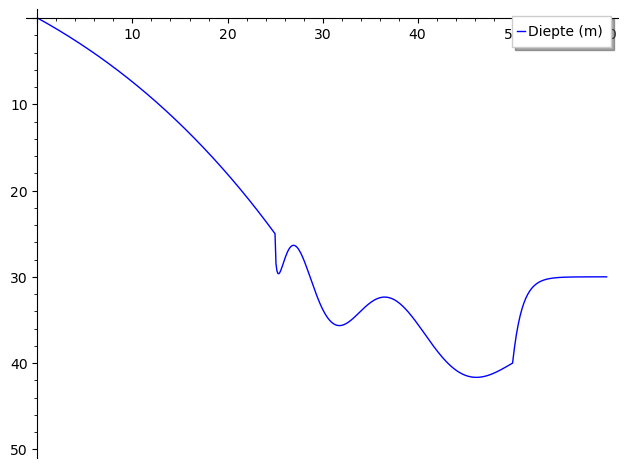

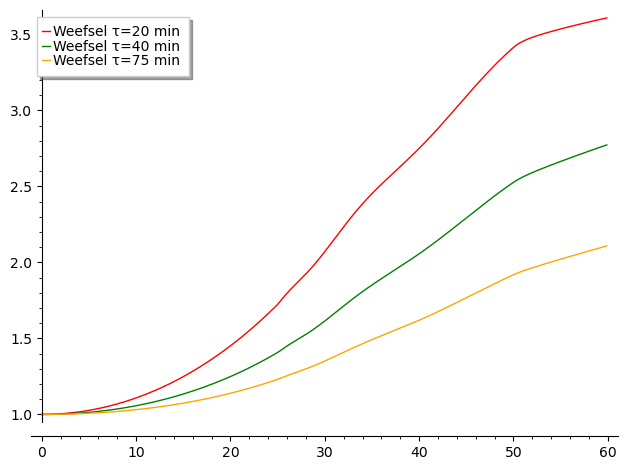

In [3]:
# plot van diepte en weefseldrukken na de 60 min duik
kleuren = ['red', 'green', 'orange']

p1 = list_plot(list(zip(times, depths)), plotjoined=True, legend_label='Diepte (m)')
p1.set_axes_range(ymin=50, ymax=0)  # dit inverteerd onze as zodat het lijtk alsof we duiken in de zee

p2 = sum([list_plot(list(zip(times, pressures[i])), plotjoined=True, color=kleuren[i], legend_label=f'Weefsel τ={int(taus[i])} min') for i in range(len(taus))])
show(p1)
show(p2)

### Echte berekening van de stops

In [8]:
# Vastgestelde decompressiestops
deco_stops = [15, 12, 9, 6, 3]  # meters
surface_depth = 0
dt_stop = 0.1  # minuten
M = 1/2.15  # zoals opgegeven

# Arrays voor volledige tijd, diepte en weefseldrukken inclusief decompressiestops
times_full = times[:]
depths_full = depths[:]
pressures_full = [p[:] for p in pressures]

# Huidige druk in weefsels tijdens decompressie
p_deco = p_current[:]
t_current = times[-1]  # starttijd decompressie

# duiksnelheid
r = 18  # m/min
current_depth = depths[-1]  # start at the last depth of the bottom dive
stops = [] 


for next_depth in deco_stops:
    if next_depth >= current_depth:
        continue
    
    # Bereken stijgtijd
    delta_depth = current_depth - next_depth
    t_rise = delta_depth / r  # minuten
    
    # Simuleer stijging in kleine dt-stapjes
    t_elapsed = 0
    while t_elapsed < t_rise:
        # print("happens")
        dt_sim = min(dt_stop, t_rise - t_elapsed)
        pe_current = omgevingsdruk(current_depth - r*dt_sim)
        for i, tau in enumerate(taus):
            p_deco[i] = update_pressure(p_deco[i], pe_current, tau, dt_sim)
            
        t_elapsed += dt_sim
        t_current += dt_sim
        current_depth -= r*dt_sim
        
        # Voeg tussentijdse punten toe voor grafiek
        times_full.append(t_current)
        depths_full.append(current_depth)
        for i in range(len(taus)):
            pressures_full[i].append(p_deco[i])
            
    
    # Nu op de stopdiepte aangekomen
    pe_next = omgevingsdruk(next_depth)
    
    # Controleer of stop nodig
    if all(p_deco[i] <= pe_next / M for i in range(len(taus))):
        stops.append((next_depth, 0))
        current_depth = next_depth
        times_full.append(t_current)
        depths_full.append(current_depth)
        for i in range(len(taus)):
            pressures_full[i].append(p_deco[i])
            test+=1
        continue
    
    # Simuleer stop totdat veilig
    t_stop = 0
    safe = False
    while not safe:
        for i, tau in enumerate(taus):
            p_deco[i] = update_pressure(p_deco[i], pe_next, tau, dt_stop)
        t_stop += dt_stop
        t_current += dt_stop
        # Voeg punten toe voor grafiek
        times_full.append(t_current)
        depths_full.append(current_depth)
        for i in range(len(taus)):
            pressures_full[i].append(p_deco[i])
        safe = all(p_deco[i] <= pe_next / M for i in range(len(taus)))
    
    # Stop opslaan
    stops.append((next_depth, t_stop))
    current_depth = next_depth

# voeg oppervlak toe op het einde
stops.append((0, 0))
times_full.append(t_current)
depths_full.append(0)
for i in range(len(taus)):
    pressures_full[i].append(p_deco[i])


In [9]:
# resultaten in text
print("Decompressiestops (diepte, duur in minuten):")

for stop in stops:
    print(f"{stop[0]:.1f} m : {stop[1]:.1f} min")


Decompressiestops (diepte, duur in minuten):
15.0 m : 0.0 min
12.0 m : 0.0 min
9.0 m : 0.0 min
6.0 m : 2.0 min
3.0 m : 10.2 min
0.0 m : 0.0 min


### We bekijken het duik verloop met onze decompressie stops

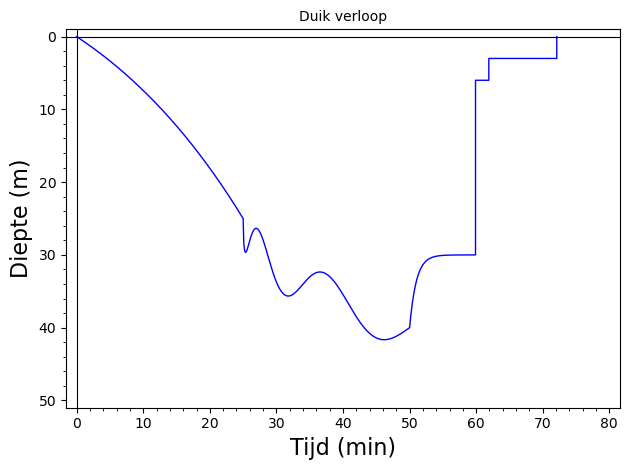

In [10]:
# maak arrays voor volledige tijd en diepte inclusief decompressie
times_full = times[:]
depths_full = depths[:]

# voeg decompressiestops toe als continue punten
t_current = times[-1]
for stop in stops:
    depth, duration = stop
    # begin punt
    times_full.append(t_current)
    depths_full.append(depth)
    # eind punt
    t_current += duration
    times_full.append(t_current)
    depths_full.append(depth)



# plot van de volledige duik inclusief decompressiestops
p_duik = list_plot(list(zip(times_full, depths_full)), plotjoined=True, frame=True, title="Duik verloop")

# y-as omkeren
p_duik.set_axes_range(xmin=0, xmax=80, ymin=50, ymax=0)

p_duik.axes_labels(['Tijd (min)', 'Diepte (m)'])

show(p_duik)



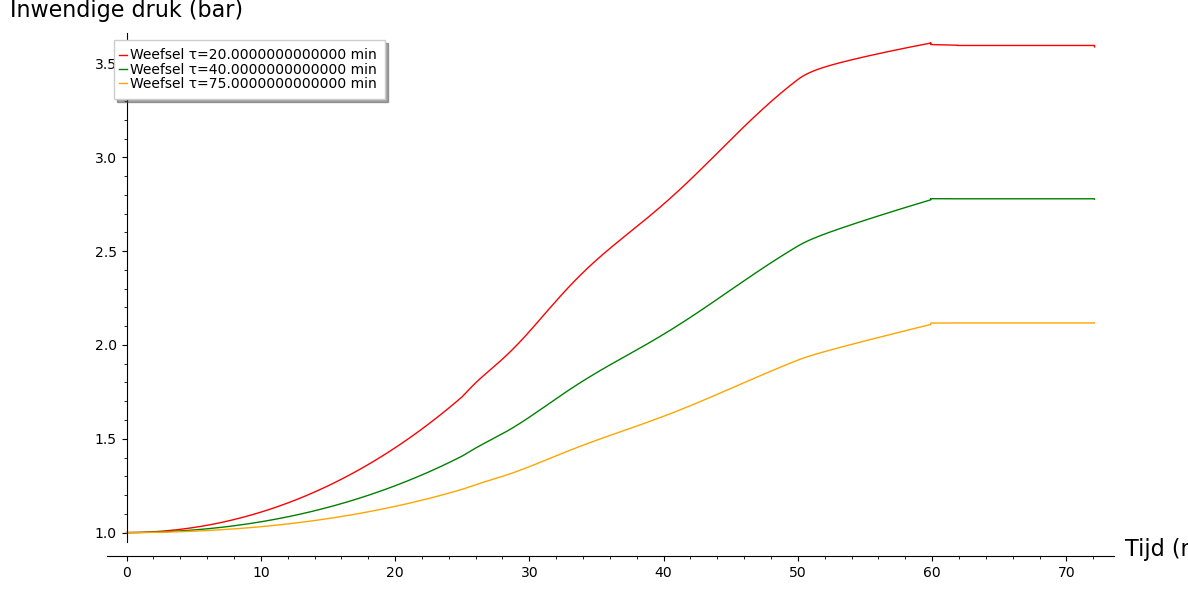

In [13]:
# Kleuren voor de verschillende weefsels
kleuren = ['red', 'green', 'orange']

# Maak plots voor elk weefsel over de volledige tijd inclusief decompressiestops
plots_weefsels = sum([
    list_plot(list(zip(times_full, pressures_full[i])),
              plotjoined=True,
              color=kleuren[i],
              legend_label=f'Weefsel τ={taus[i]} min')
    for i in range(len(taus))
])

# Labels en titel
plots_weefsels.axes_labels(['Tijd (min)', 'Inwendige druk (bar)'])
# plots_weefsels.title('Inwendige druk in de weefsels tijdens duik en decompressiestops')


# Toon de grafiek
show(plots_weefsels, figsize=[12,6])


601